House Price Prediction using Linear Regression
----------------------------------------------

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [3]:
data= pd.read_csv("house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.describe(include=[np.number])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.isnull().sum()  #Data not having any NaNs

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
data.dropna(inplace = True)

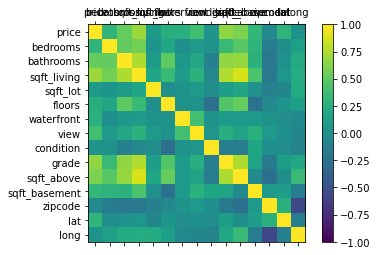

In [7]:
names=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','zipcode','lat','long']
df=data[names]
correlations= df.corr()
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,15,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

Top 5 features:

 1. bedrooms
 2. bathrooms
 3. sqft_living
 4. sqft_above
 5. grade

Now Let's convert nominal and ordinal features into category.

In [8]:
data['waterfront'] = data['waterfront'].astype('category')
data['view'] = data['view'].astype('category')
data['condition'] = data['condition'].astype('category')
data['grade'] = data['grade'].astype('category')
data['zipcode'] = data['zipcode'].astype('category')

In [9]:
data.dtypes

id                  int64
date               object
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view             category
condition        category
grade            category
sqft_above        float64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
zipcode          category
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
dtype: object

## Exploratory Analysis ##

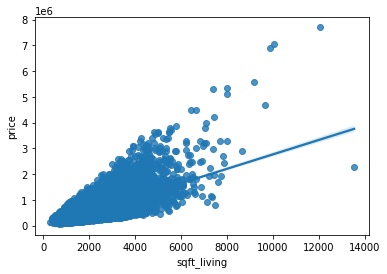

In [10]:
#sns.set_style()
sns.regplot(x='sqft_living',y='price', data=data)

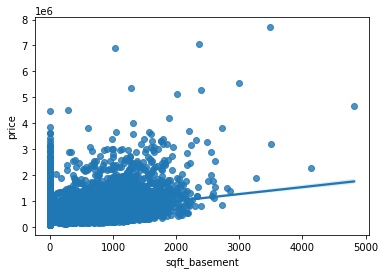

In [11]:
sns.regplot(x='sqft_basement',y='price', data=data)

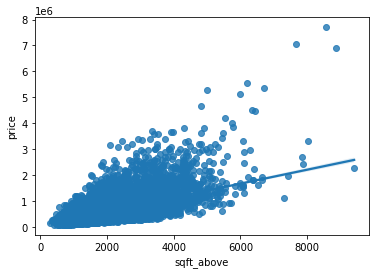

In [12]:
sns.regplot(x='sqft_above',y='price', data=data)

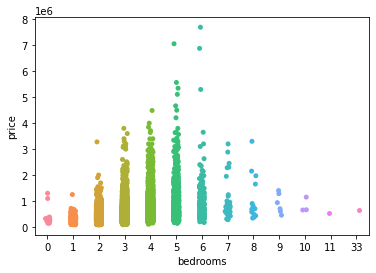

In [13]:
sns.stripplot(x='bedrooms',y='price', data=data)

The graph indicates that the relation of price with bedrooms. Price goes up with number of bedrooms upto 6 and then comes down as no of bedrooms increase.

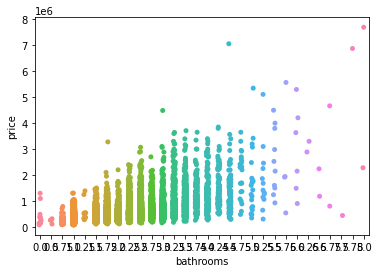

In [14]:
sns.stripplot(x='bathrooms', y='price',data=data, size=5)

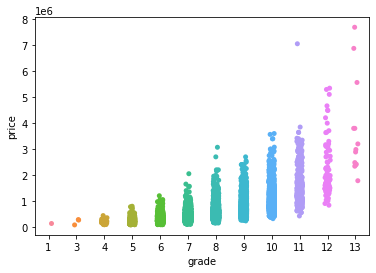

In [15]:
sns.stripplot(x='grade', y='price',data=data, size=5)

Price of the house is dependent on grade of the house, higher the grade higher the price.

We can remove outliers from data like house with bedrooms > 9 and bathrooms>7.

In [16]:
data=data[data['bedrooms'] < 10]

In [17]:
data=data[data['bathrooms']<8]

In [18]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


Building a model with top 5 parameters
----------------

In [19]:
c=['bedrooms','bathrooms','sqft_living','sqft_above','grade']
df=data[c]

In [20]:
df=pd.get_dummies(df,columns=['grade'], drop_first=True)

In [21]:
df.isna().sum()

bedrooms       0
bathrooms      0
sqft_living    0
sqft_above     0
grade_3        0
grade_4        0
grade_5        0
grade_6        0
grade_7        0
grade_8        0
grade_9        0
grade_10       0
grade_11       0
grade_12       0
grade_13       0
dtype: int64

In [22]:
y=data['price']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(df,y,train_size=0.8,random_state=42)

In [24]:
x_train.head()

,bedrooms,bathrooms,sqft_living,sqft_above,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
18145,3,2.25,1580,1220.0,0,0,0,0,1,0,0,0,0,0,0
12727,4,2.75,2520,2520.0,0,0,0,0,0,1,0,0,0,0,0
14110,3,1.75,1860,1860.0,0,0,0,0,0,1,0,0,0,0,0
7230,5,2.50,1990,1990.0,0,0,0,0,1,0,0,0,0,0,0
10163,5,2.25,3320,1900.0,0,0,0,0,0,0,1,0,0,0,0


In [25]:
reg=LinearRegression()

In [26]:
reg.fit(x_train,y_train)

LinearRegression()

In [28]:
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [-2.24307799e+04 -7.51378535e+02  2.29951965e+02 -9.50867766e+01
  1.15298946e+05  6.11089665e+04  6.00238657e+04  8.67789401e+04
  1.20512140e+05  1.94986569e+05  3.39783753e+05  5.36780415e+05
  8.30221479e+05  1.33980576e+06  2.59074712e+06]


In [29]:
print(metrics.mean_squared_error(y_test, reg.predict(x_test)))

60070859494.38393


In [30]:
reg.score(x_test,y_test)

0.6064078017900029

Building a model with all parameters
------------------------------------

In [31]:
df=pd.get_dummies(data,columns=['waterfront','view','condition','grade','zipcode'], drop_first=True)

In [32]:
y=data['price']
df= df.drop(['date','id','price'],axis=1)

In [33]:
x_train,x_test,y_train,y_test=train_test_split(df,y,train_size=0.8,random_state=42)

In [34]:
reg.fit(x_train,y_train)

LinearRegression()

In [35]:
print('Coefficients: \n', reg.coef_)
print(metrics.mean_squared_error(y_test, reg.predict(x_test)))
print(reg.score(x_test,y_test))

Coefficients: 
 [-1.02739634e+04  2.69031365e+04  8.65803722e+01  2.41739186e-01
 -2.72326105e+04  6.79845200e+01  1.86038411e+01 -3.16198561e+02
  2.41170153e+01  2.21489943e+05 -1.85922081e+05  2.11400911e+01
 -4.76775024e-02  5.09028010e+05  8.97653130e+04  7.12407720e+04
  1.36292541e+05  3.14534790e+05  1.06547012e+05  1.15848306e+05
  1.40579169e+05  1.86192981e+05  1.84169570e+04 -8.29813974e+04
 -1.33633924e+05 -1.35953845e+05 -1.31329228e+05 -1.08171765e+05
 -3.29471287e+04  8.76061245e+04  2.73973764e+05  6.79482914e+05
  1.72741170e+06  1.69460595e+04 -6.81752702e+03  7.00841130e+05
  2.65069261e+05  2.20051758e+05  2.14763121e+05  2.31162782e+05
  1.02656670e+05  5.54087179e+04  8.81677948e+04  6.50069895e+04
  6.14790974e+04 -4.54555553e+04  1.45376479e+05  1.66132223e+05
  4.06174303e+04  2.21071177e+05  1.18490528e+04  1.16312242e+04
 -1.03433734e+04  2.91903594e+05  1.20967440e+05  6.76886879e+04
  1.21482216e+06  4.61790778e+05  2.19084969e+04  1.53872019e+05
  1.93117

 - Mean Square Error: 25937137901.6
 - R-square:  0.83